In [66]:
#importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [67]:
# reading
df = pd.read_csv('all_fuels_data.csv')
d = df.dropna()

In [68]:
d.value_counts("commodity")

commodity
Crude Oil          5772
Natural Gas        5768
Heating Oil        5765
RBOB Gasoline      5726
Brent Crude Oil    3984
dtype: int64

In [69]:
# labeling categroical values to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
d['commodity_num'] = le.fit_transform(d.commodity)
d.head()


,ticker,commodity,date,open,high,low,close,volume,commodity_num
0,CL=F,Crude Oil,2000-08-23,31.950001,32.799999,31.950001,32.049999,79385,1
1,CL=F,Crude Oil,2000-08-24,31.900000,32.240002,31.400000,31.629999,72978,1
2,CL=F,Crude Oil,2000-08-25,31.700001,32.099998,31.320000,32.049999,44601,1
3,CL=F,Crude Oil,2000-08-28,32.040001,32.919998,31.860001,32.869999,46770,1
4,CL=F,Crude Oil,2000-08-29,32.820000,33.029999,32.560001,32.720001,49131,1


In [70]:
open1 = d["open"]
open1 = (open1 - np.mean(open1)) / np.std(open1)

high = d["high"]
high = (high - np.mean(high)) / np.std(high)

low = d["low"]
low = (low - np.mean(low)) / np.std(low)

commodity = d["commodity_num"]
commodity = (commodity - np.mean(commodity)) / np.std(commodity)

close = d["close"]
close = (close - np.mean(close)) / np.std(close)
xn = (open1, high, low, commodity)
x = np.array(xn)
n = len(close)


In [71]:
w = np.zeros(4)
b = 0
derivative_b = 0
derivative_w = np.zeros(4)
y_pred = w[0] * x[0] + w[1] * x[1] + w[2] * x[2] + w[3] * x[3] + b

In [72]:
# gradient descent optimization algorithm
alpha = 0.001
gl = []
ng = []
for i in range(10000):
    y_pred = w[0] * x[0] + w[1] * x[1] + w[2] * x[2] + w[3] * x[3] + b
    for j in range(4):
        derivative_w[j] = (1 / n) * np.sum((y_pred - close) * x[j])
        derivative_b = (1 / n) * np.sum((y_pred - close))
        w[j] -= alpha * derivative_w[j]
        b -= alpha * derivative_b
    
    k = (1 / (2 * n)) * np.sum((y_pred - close) ** 2)
    gl.append(k)
    ng.append(i)


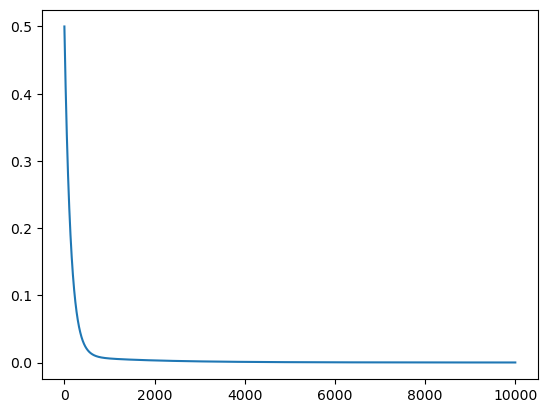

In [73]:
# plot to show cost vs no of iterations
plt.plot(ng, gl)
plt.show()


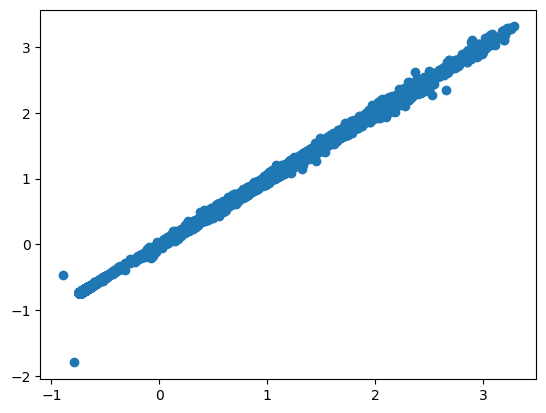

In [74]:
# plot to show predicted closing price of fuels vs actual price
plt.scatter(y_pred, close)
plt.show()

In [75]:
# calculatin R_2 accuracy using sklearn
from sklearn.metrics import r2_score
score = r2_score(close, y_pred)
print("The accuracy of our model is {}%".format(round(score, 5) *100))

The accuracy of our model is 99.964%
